In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


In [2]:
# Define a function to update the data frame
def update_dataframe(df, hidden_layer_size, activation_function, learning_rate, solver_algorithm, max_iter, score,
                     training_time):
    """
    Update the data frame with a new row of data.
    """
    new_row = pd.DataFrame({'Hidden Layer Sizes': [hidden_layer_size],
                            'Activation Function': [activation_function],
                            'Learning Rate': [learning_rate],
                            'Solver Algorithm': [solver_algorithm],
                            'Max Iterations': [max_iter],
                            'Classification Accuracy': [score],
                            'Training time': [training_time],
                            })
    df = pd.concat([df, new_row], ignore_index=True)
    return df

In [3]:

# Define the path where the data files are located
path = "./CareerCon/"

# Read the training data from CSV files and create dataframes
dfX = pd.read_csv(path + "X_train.csv")  # Dataframe for training data
dfy = pd.read_csv(path + "y_train.csv")  # Dataframe for training labels

# Prepare the feature space
data = dfX.to_numpy()  # Convert data frame into a NumPy array
data = data[:, 3:]  # Remove first 3 columns of identifiers
X = np.reshape(data, (int(data.shape[0] / 128),
                      10 * 128))  # Reshape the feature space so that 128 timestamps for the same trial are tiled into a single row
# The resulting 'X' is a 2D feature matrix, where each row represents a single trial with 128 timestamps and 10 features per timestamp.

# Prepare the labels vector
surfaces = dfy['surface']  # Extract labels from the 'surface' column of the labels dataframe
types = list(
    set(surfaces))  # Get the unique labels by converting the 'surfaces' list into a set and then back into a list
y = [types.index(s) for s in
     surfaces]  # Convert labels from strings to numerical values by finding the index of each label in the 'types' list
# The resulting 'y' is a list of numerical labels corresponding to the surface types, which can be used for training a machine learning model.


Task 2
A. change the network structure (number of layers and neurons), and parameters (transfer functions, learning rate, algorithms, stop conditions): how does classification accuracy change? What about training time?
B. apply PCA on the dataset, varying the number of dimensions you keep. Perform classification on the reduced datasets. How does accuracy change with different dimensions? What does that tell you about the original dataset?
Perform systematic tests on appropriate values and ranges and report your results, answering the questions.

In [4]:
# this code is only an example, remove it or change it

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

clf = MLPClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.42707240293809023


A. Change the network structure (number of layers and neurons), and parameters (transfer functions, learning rate, algorithms, stop conditions): how does classification accuracy change? What about training time?

In [5]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
# X_train: Training feature data
# X_test: Testing feature data
# y_train: Training labels
# y_test: Testing labels

# Create an instance of MLPClassifier (Multi-Layer Perceptron) for classification
clf = MLPClassifier()
# clf: Classifier object

start_time = time.time()
# Train the classifier on the training data
clf.fit(X_train, y_train)
# X_train: Training feature data
# y_train: Training labels
end_time = time.time()

# Measure the training time
training_time = end_time - start_time
# Calculate the accuracy score of the classifier on the testing data
score = clf.score(X_test, y_test)
# X_test: Testing feature data
# y_test: Testing labels


# Print the accuracy score
print(score)

print("Classification Accuracy: {:.2f}".format(score))

print("Training time: {:.2f} seconds".format(training_time))

df = pd.DataFrame({
    'Hidden Layer Sizes': [(100,)],
    'Activation Function': ['relu'],
    'Learning Rate': [0.001],
    'Solver Algorithm': ['adam'],
    'Max Iterations': [200],
    'Classification Accuracy': [score],
    'Training time': [training_time],
})

0.45435466946484787
Classification Accuracy: 0.45
Training time: 23.41 seconds


In [6]:
# Examples

# Example: Varying the number of hidden layers and neurons
hidden_layer_sizes = [(50,), (100,), (200,), (100, 50), (200, 100)]  # Example: varying hidden layers and neurons
for hidden_layer_size in hidden_layer_sizes:
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation='relu', solver='adam',
                        learning_rate_init=0.001, max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Hidden Layers: {hidden_layer_size}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'relu', 0.001, 'adam',
                          200, score,
                          training_time)

/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (50,), Classification Accuracy: 0.44176285414480587
Training time: 13.06 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (100,), Classification Accuracy: 0.49527806925498424
Training time: 19.21 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (200,), Classification Accuracy: 0.49213011542497376
Training time: 34.45 seconds
Hidden Layers: (100, 50), Classification Accuracy: 0.5257082896117523
Training time: 21.11 seconds
Hidden Layers: (200, 100), Classification Accuracy: 0.5309548793284365
Training time: 35.12 seconds


In [7]:
# Example: Varying the number of hidden layers and neurons
hidden_layer_sizes = [(50,), (100,), (200,), (100, 50), (200, 100)]  # Example: varying hidden layers and neurons
for hidden_layer_size in hidden_layer_sizes:
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation='identity', solver='adam',
                        learning_rate_init=0.001, max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Hidden Layers: {hidden_layer_size}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'identity', 0.001, 'adam',
                          200, score,
                          training_time)

Hidden Layers: (50,), Classification Accuracy: 0.2675760755508919
Training time: 6.88 seconds
Hidden Layers: (100,), Classification Accuracy: 0.2938090241343127
Training time: 11.79 seconds
Hidden Layers: (200,), Classification Accuracy: 0.2738719832109129
Training time: 5.63 seconds
Hidden Layers: (100, 50), Classification Accuracy: 0.25603357817418676
Training time: 9.87 seconds
Hidden Layers: (200, 100), Classification Accuracy: 0.28751311647429173
Training time: 14.97 seconds


In [8]:
# Example: Varying the number of hidden layers and neurons
hidden_layer_sizes = [(50,), (100,), (200,), (100, 50), (200, 100)]  # Example: varying hidden layers and neurons
for hidden_layer_size in hidden_layer_sizes:
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation='logistic', solver='sgd',
                        learning_rate_init=0.001, max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Hidden Layers: {hidden_layer_size}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'logistic', 0.001, 'sgd',
                          200, score,
                          training_time)

/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (50,), Classification Accuracy: 0.33473242392444913
Training time: 12.45 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (100,), Classification Accuracy: 0.3578174186778594
Training time: 17.93 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (200,), Classification Accuracy: 0.3546694648478489
Training time: 32.81 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (100, 50), Classification Accuracy: 0.28541448058761804
Training time: 24.82 seconds
Hidden Layers: (200, 100), Classification Accuracy: 0.2759706190975866
Training time: 57.33 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
# Example: Varying the number of hidden layers and neurons
hidden_layer_sizes = [(50,), (100,), (200,), (100, 50), (200, 100)]  # Example: varying hidden layers and neurons
for hidden_layer_size in hidden_layer_sizes:
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation='tanh', solver='sgd', learning_rate_init=0.001,
                        max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Hidden Layers: {hidden_layer_size}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'tanh', 0.001, 'sgd',
                          200, score,
                          training_time)

/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (50,), Classification Accuracy: 0.38719832109129065
Training time: 13.53 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (100,), Classification Accuracy: 0.38719832109129065
Training time: 18.43 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (200,), Classification Accuracy: 0.41657922350472193
Training time: 33.44 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layers: (100, 50), Classification Accuracy: 0.3987408184679958
Training time: 24.19 seconds
Hidden Layers: (200, 100), Classification Accuracy: 0.42707240293809023
Training time: 44.98 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


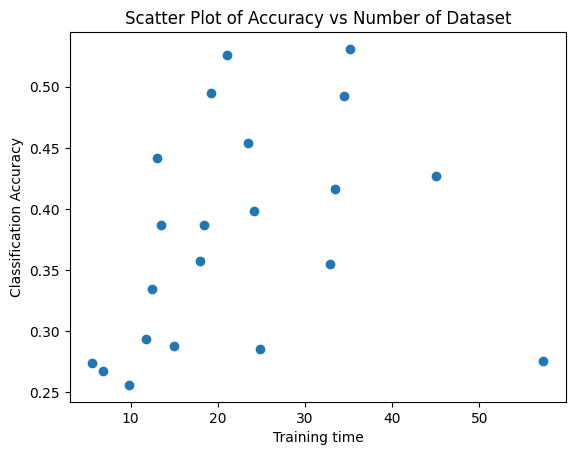

In [10]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Training time']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Training time')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

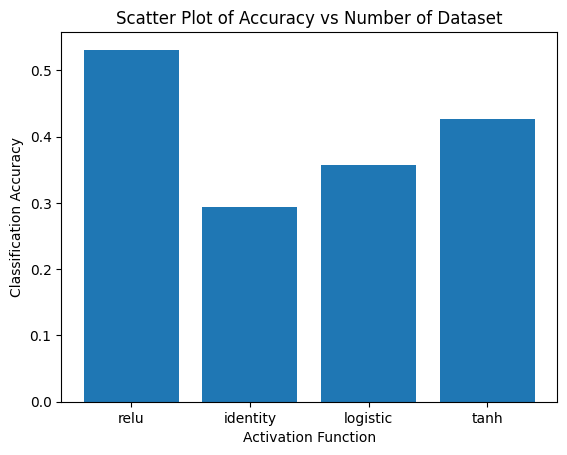

In [12]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Activation Function']
y = df['Classification Accuracy']

# Create a scatter plot
plt.bar(x, y)
plt.xlabel('Activation Function')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

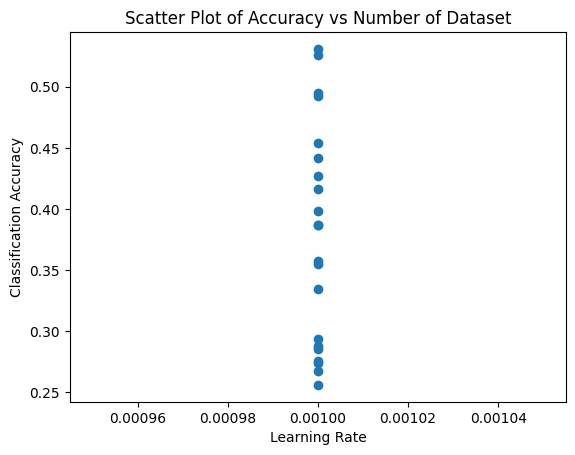

In [15]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Learning Rate']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Learning Rate')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

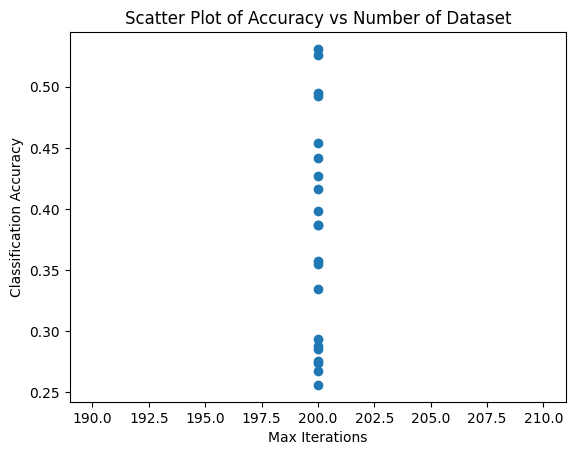

In [16]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Max Iterations']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Max Iterations')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

In [17]:
# Example: Changing the activation function
activation_functions = ['identity', 'logistic', 'tanh', 'relu']  # Example: varying activation functions
for activation_function in activation_functions:
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation=activation_function, solver='adam',
                        learning_rate_init=0.001, max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Activation Function: {activation_function}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, activation_function, 0.001, 'adam',
                          200, score,
                          training_time)

Activation Function: identity, Classification Accuracy: 0.2644281217208814
Training time: 5.93 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic, Classification Accuracy: 0.5246589716684156
Training time: 23.20 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh, Classification Accuracy: 0.4700944386149003
Training time: 19.66 seconds
Activation Function: relu, Classification Accuracy: 0.48898216159496327
Training time: 21.36 seconds


In [18]:
# Example: Changing the activation function
activation_functions = ['identity', 'logistic', 'tanh', 'relu']  # Example: varying activation functions
for activation_function in activation_functions:
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation=activation_function, solver='adam',
                        learning_rate_init=0.001, max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Activation Function: {activation_function}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, activation_function, 0.001, 'sgd',
                          200, score,
                          training_time)

Activation Function: identity, Classification Accuracy: 0.23924449108079748
Training time: 16.04 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic, Classification Accuracy: 0.5068205666316894
Training time: 19.78 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh, Classification Accuracy: 0.47114375655823715
Training time: 18.16 seconds
Activation Function: relu, Classification Accuracy: 0.4491080797481637
Training time: 18.83 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
# Example: Modifying the learning rate
learning_rates = [0.001, 0.01, 0.1]  # Example: varying learning rates
for learning_rate in learning_rates:
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=learning_rate,
                        max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Learning Rate: {learning_rate}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'relu', learning_rate, 'adam',
                          200, score,
                          training_time)


Learning Rate: 0.001, Classification Accuracy: 0.4627492130115425
Training time: 22.87 seconds
Learning Rate: 0.01, Classification Accuracy: 0.2602308499475341
Training time: 8.36 seconds
Learning Rate: 0.1, Classification Accuracy: 0.2203567681007345
Training time: 4.03 seconds


In [20]:
# Example: Modifying the learning rate
learning_rates = [0.001, 0.01, 0.1]  # Example: varying learning rates
for learning_rate in learning_rates:
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam',
                        learning_rate_init=learning_rate, max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Learning Rate: {learning_rate}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'logistic', learning_rate, 'adam',
                          200, score,
                          training_time)


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001, Classification Accuracy: 0.5099685204616999
Training time: 22.31 seconds
Learning Rate: 0.01, Classification Accuracy: 0.3001049317943337
Training time: 5.54 seconds
Learning Rate: 0.1, Classification Accuracy: 0.11857292759706191
Training time: 1.87 seconds


In [21]:
# Example: Modifying the learning rate
learning_rates = [0.001, 0.01, 0.1]  # Example: varying learning rates
for learning_rate in learning_rates:
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver='adam', learning_rate_init=learning_rate,
                        max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Learning Rate: {learning_rate}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'tanh', learning_rate, 'adam',
                          200, score,
                          training_time)


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001, Classification Accuracy: 0.4627492130115425
Training time: 20.08 seconds
Learning Rate: 0.01, Classification Accuracy: 0.2203567681007345
Training time: 1.93 seconds
Learning Rate: 0.1, Classification Accuracy: 0.16789087093389296
Training time: 3.11 seconds


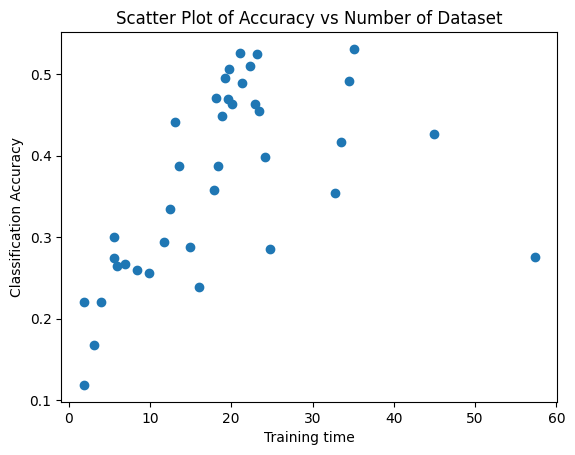

In [22]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Training time']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Training time')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

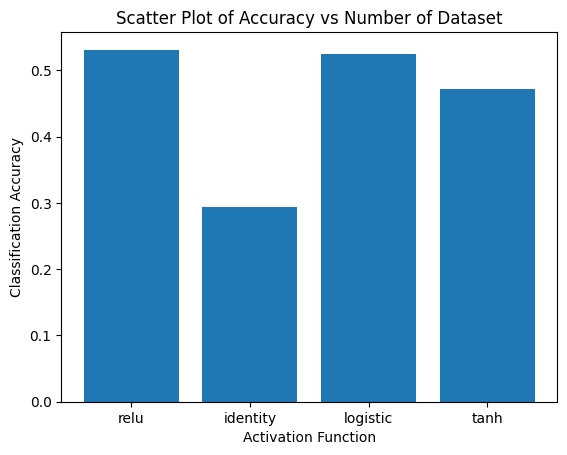

In [24]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Activation Function']
y = df['Classification Accuracy']

# Create a scatter plot
plt.bar(x, y)
plt.xlabel('Activation Function')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()


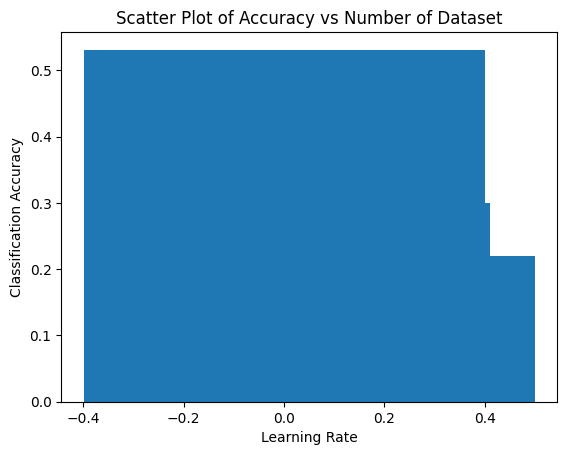

In [26]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Learning Rate']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Learning Rate')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

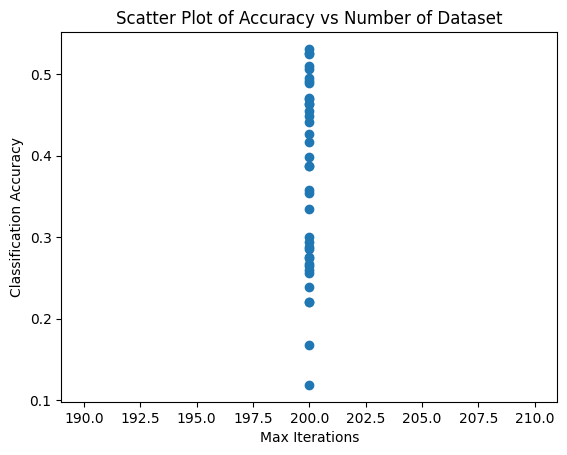

In [27]:


# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Max Iterations']
y = df['Classification Accuracy']

# Create a scatter plot
plt.bar(x, y)
plt.xlabel('Max Iterations')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

In [28]:
# Example: Changing the solver algorithm
solver_algorithms = ['adam', 'sgd', 'lbfgs']  # Example: varying solver algorithms
for solver_algorithm in solver_algorithms:
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver=solver_algorithm, learning_rate_init=0.001,
                        max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Solver Algorithm: {solver_algorithm}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'tanh', learning_rate, solver_algorithm,
                          200, score,
                          training_time)


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Solver Algorithm: adam, Classification Accuracy: 0.48163693599160545
Training time: 31.99 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Solver Algorithm: sgd, Classification Accuracy: 0.4228751311647429
Training time: 25.12 seconds
Solver Algorithm: lbfgs, Classification Accuracy: 0.3882476390346275
Training time: 13.18 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [29]:
# Example: Changing the solver algorithm
solver_algorithms = ['adam', 'sgd', 'lbfgs']  # Example: varying solver algorithms
for solver_algorithm in solver_algorithms:
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver=solver_algorithm,
                        learning_rate_init=0.001, max_iter=200)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Solver Algorithm: {solver_algorithm}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'logistic', learning_rate, solver_algorithm,
                          200, score,
                          training_time)


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Solver Algorithm: adam, Classification Accuracy: 0.5183630640083945
Training time: 22.56 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Solver Algorithm: sgd, Classification Accuracy: 0.34207764952780695
Training time: 15.66 seconds
Solver Algorithm: lbfgs, Classification Accuracy: 0.4144805876180483
Training time: 15.01 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


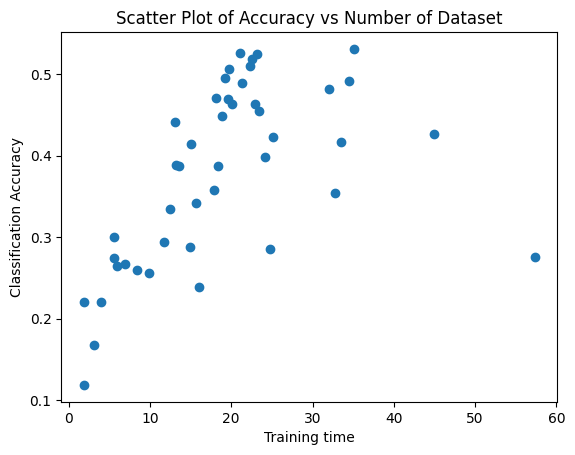

In [32]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Training time']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Training time')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()


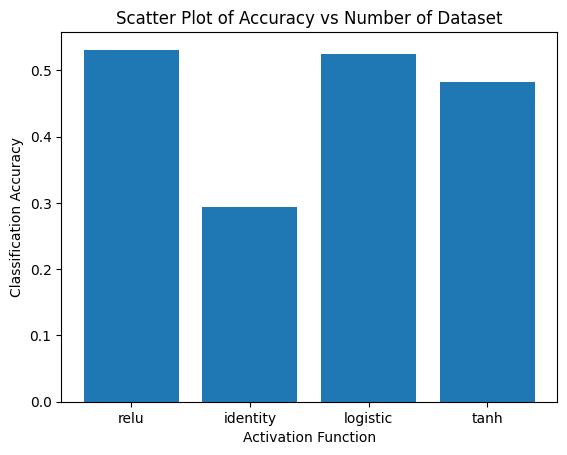

In [34]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Activation Function']
y = df['Classification Accuracy']

# Create a scatter plot
plt.bar(x, y)
plt.xlabel('Activation Function')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

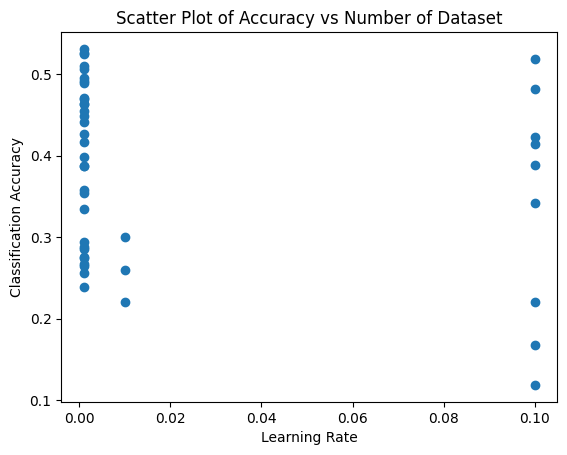

In [37]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Learning Rate']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Learning Rate')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()


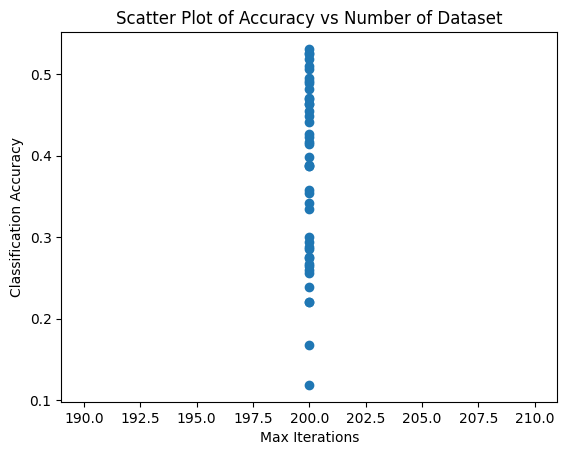

In [41]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Max Iterations']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Max Iterations')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

In [42]:
# Example: Modifying the maximum number of iterations
max_iters = [100, 200, 500]  # Example: varying maximum number of iterations
for max_iter in max_iters:
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.001,
                        max_iter=max_iter)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Maximum Iterations: {max_iter}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'relu', learning_rate, 'adam',
                          max_iter, score,
                          training_time)


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Maximum Iterations: 100, Classification Accuracy: 0.4438614900314795
Training time: 11.30 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Maximum Iterations: 200, Classification Accuracy: 0.47639034627492133
Training time: 19.63 seconds
Maximum Iterations: 500, Classification Accuracy: 0.4627492130115425
Training time: 16.87 seconds


In [43]:
# Example: Modifying the maximum number of iterations
max_iters = [100, 200, 500]  # Example: varying maximum number of iterations
for max_iter in max_iters:
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate_init=0.001,
                        max_iter=max_iter)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    score = clf.score(X_test, y_test)
    print(f"Maximum Iterations: {max_iter}, Classification Accuracy: {score}")
    print("Training time: {:.2f} seconds".format(training_time))
    df = update_dataframe(df, hidden_layer_size, 'logistic', learning_rate, 'sgd',
                          max_iter, score,
                          training_time)


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Maximum Iterations: 100, Classification Accuracy: 0.31374606505771246
Training time: 10.75 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Maximum Iterations: 200, Classification Accuracy: 0.35362014690451204
Training time: 18.41 seconds
Maximum Iterations: 500, Classification Accuracy: 0.3955928646379853
Training time: 44.75 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


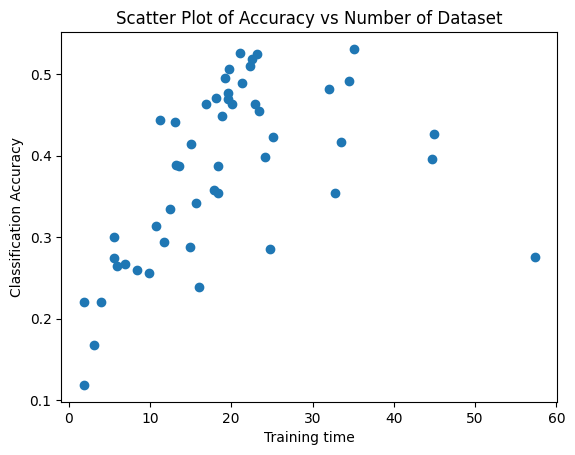

In [44]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Training time']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Training time')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()


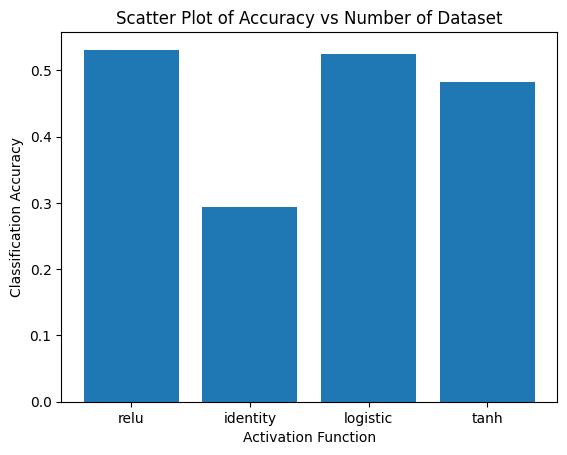

In [46]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Activation Function']
y = df['Classification Accuracy']

# Create a scatter plot
plt.bar(x, y)
plt.xlabel('Activation Function')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

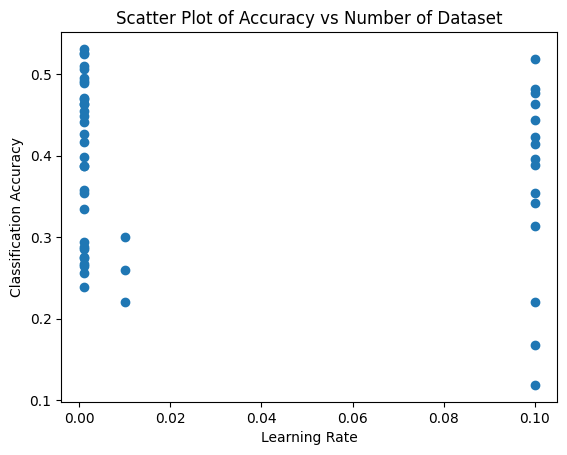

In [49]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Learning Rate']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Learning Rate')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()


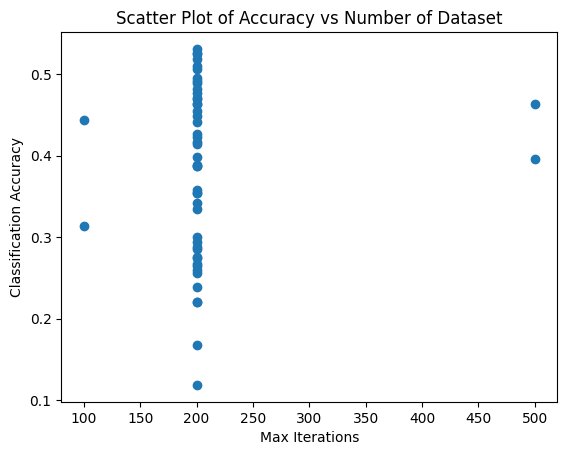

In [50]:

# Extract the 'Joint range X' and 'Joint range Y' columns
x = df['Max Iterations']
y = df['Classification Accuracy']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Max Iterations')
plt.ylabel('Classification Accuracy')
plt.title('Scatter Plot of Accuracy vs Number of Dataset')
plt.show()

B. Apply PCA on the dataset, varying the number of dimensions you keep. Perform classification on the reduced datasets. How does accuracy change with different dimensions? What does that tell you about the original dataset?

In [53]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import time

# Initialize lists to store results
activation_results = []
score_results = []

# Perform PCA with varying number of dimensions
n_dimensions = [10, 20, 30, 40, 50]  # Example: varying number of dimensions
activation_functions = ['relu', 'tanh', 'logistic']  # Example: different activation functions
for n in n_dimensions:
    for activation in activation_functions:
        # Perform PCA
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train and evaluate MLPClassifier on reduced datasets
        clf = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, solver='adam', learning_rate_init=0.001, max_iter=200)
        start_time = time.time()
        clf.fit(X_train_pca, y_train)  # Fix: Use X_train_pca instead of X_train
        end_time = time.time()
        training_time = end_time - start_time
        score = clf.score(X_test_pca, y_test)
               # Append results to lists
        activation_results.append(activation)
        score_results.append(score)
        print(f"Number of Dimensions: {n}, Activation Function: {activation}, Classification Accuracy: {score}")
        print("Training time: {:.2f} seconds".format(training_time))


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 10, Activation Function: relu, Classification Accuracy: 0.3578174186778594
Training time: 0.94 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 10, Activation Function: tanh, Classification Accuracy: 0.32633788037775446
Training time: 0.89 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 10, Activation Function: logistic, Classification Accuracy: 0.3777544596012592
Training time: 1.24 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 20, Activation Function: relu, Classification Accuracy: 0.41343126967471144
Training time: 2.69 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 20, Activation Function: tanh, Classification Accuracy: 0.385099685204617
Training time: 2.29 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 20, Activation Function: logistic, Classification Accuracy: 0.45540398740818466
Training time: 2.56 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 30, Activation Function: relu, Classification Accuracy: 0.38719832109129065
Training time: 2.34 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 30, Activation Function: tanh, Classification Accuracy: 0.3462749213011542
Training time: 2.43 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 30, Activation Function: logistic, Classification Accuracy: 0.41133263378803775
Training time: 3.23 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 40, Activation Function: relu, Classification Accuracy: 0.38929695697796435
Training time: 2.55 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 40, Activation Function: tanh, Classification Accuracy: 0.32214060860440713
Training time: 3.29 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 40, Activation Function: logistic, Classification Accuracy: 0.4018887722980063
Training time: 2.94 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 50, Activation Function: relu, Classification Accuracy: 0.40713536201469047
Training time: 2.64 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of Dimensions: 50, Activation Function: tanh, Classification Accuracy: 0.33473242392444913
Training time: 3.25 seconds
Number of Dimensions: 50, Activation Function: logistic, Classification Accuracy: 0.40713536201469047
Training time: 3.38 seconds


/Users/toluwanimi/PycharmProjects/final-course-work/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


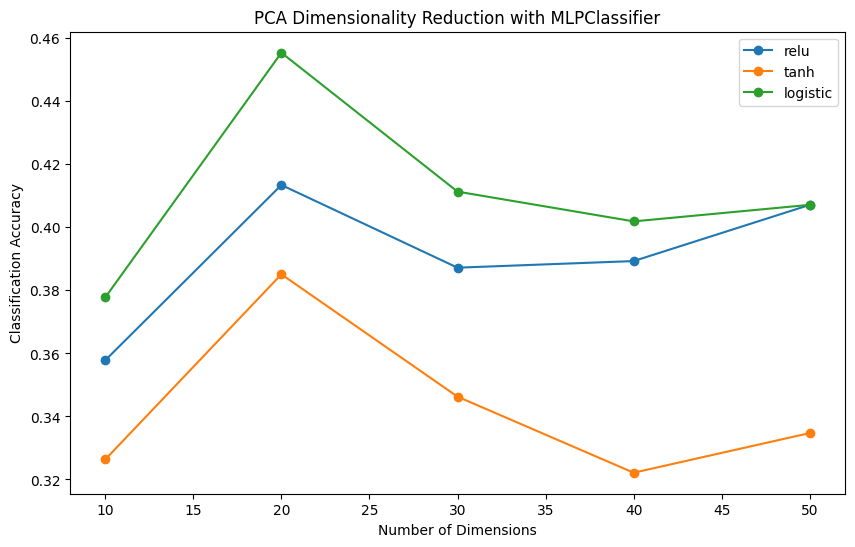

In [54]:
# Convert lists to NumPy arrays for plotting
activation_results = np.array(activation_results)
score_results = np.array(score_results)

# Plot activation vs. score
plt.figure(figsize=(10, 6))
for activation in activation_functions:
    plt.plot(n_dimensions, score_results[activation_results == activation], '-o', label=activation)
plt.xlabel('Number of Dimensions')
plt.ylabel('Classification Accuracy')
plt.title('PCA Dimensionality Reduction with MLPClassifier')
plt.legend()
plt.show()